#### A Python Integer Is More Than Just an Integer

The standard Python implementation is written in C. This means that every Python object is simply a cleverly disguised C structure, which contains not only its value, but other information as well. For example, when we define an integer in Python, such as x = 10000, x is not just a “raw” integer. It’s actually a pointer to a compound C struc‐ ture, which contains several values. 

struct _longobject

{ long ob_refcnt;

PyTypeObject *ob_type; 

size_t ob_size;

long ob_digit[1];

};

• ob_refcnt, a reference count that helps Python silently handle memory alloca‐ tion and deallocation

• ob_type, which encodes the type of the variable

• ob_size, which specifies the size of the following data members

• ob_digit, which contains the actual integer value that we expect the Python vari‐ able to represent


#### A Python List Is More Than Just a List

each item in the list must contain its own type info, reference count, and other information—that is, each item is a complete Python object. In the special case that all variables are of the same type


￼At the implementation level, the array essentially contains a single pointer to one con‐ tiguous block of data. The Python list, on the other hand, contains a pointer to a block of pointers, each of which in turn points to a full Python object like the Python integer


Fixed-type NumPy-style arrays lack this flexibil‐ ity, but are much more efficient for storing and manipulating data

In [1]:
import numpy as np 
np.random.seed(0)


In [2]:
def compute_reciprocals(values): 
    output = np.empty(len(values)) 
    for i in range(len(values)):
        output[i] = 1.0 / values[i] 
    return output

In [3]:
  values = np.random.randint(1, 10, size=5)

In [4]:
 compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [5]:
 big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

2.19 s ± 26.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It turns out that the bottleneck here is not the operations themselves, but the type-checking and function dispatches that CPython must do at each cycle of the loop. Each time the reciprocal is computed, Python first examines the object’s type and does a dynamic lookup of the correct function to use for that type. If we were working in compiled code instead, this type specification would be known before the code exe‐ cutes and the result could be computed much more efficiently

In [7]:
print(compute_reciprocals(values)) 
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


In [8]:
 %timeit (1.0 / big_array)

3.31 ms ± 155 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


In [12]:
 y = np.zeros(10)

In [13]:
np.power(2, x, out=y[::2])

array([ 1.,  2.,  4.,  8., 16.])

In [14]:
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


In [15]:
 x = np.arange(1, 6)

In [16]:
 np.add.reduce(x)

15

In [17]:
np.multiply.reduce(x)

120

If we’d like to store all the intermediate results of the computation, we can instead use accumulate:

In [18]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [19]:
np.multiply.accumulate(x)


array([  1,   2,   6,  24, 120])

any ufunc can compute the output of all pairs of two different inputs using the outer method. This allows you, in one line, to do things like create a multiplica‐ tion table:

In [20]:
x = np.arange(1, 6)

In [21]:
 np.multiply.outer(x, x)


array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

#### US President Height Example

In [22]:
!head -4 data/president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [23]:
import pandas as pd
data = pd.read_csv('data/president_heights.csv') 
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [24]:
 print("Mean height: ", heights.mean())

Mean height:  179.73809523809524


In [25]:
 print("Standard deviation:", heights.std())

Standard deviation: 6.931843442745892


In [26]:
print("Min height:", heights.min())

Min height: 163


In [27]:
print("max height:", heights.max())

max height: 193


In [28]:
print("25th percentile:  ", np.percentile(heights, 25))     
print("Median:", np.median(heights))
print("75th percentile:", np.percentile(heights, 75))




25th percentile:   174.25
Median: 182.0
75th percentile: 183.0


In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

ModuleNotFoundError: No module named 'seaborn'

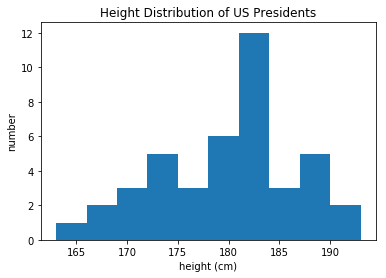

In [30]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

### Example: Counting Rainy Days

In [31]:
import numpy as np 
import pandas as pd
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values

In [32]:
inches = rainfall / 254 # 1/10mm -> inches

In [33]:
inches.shape

(365,)

In [36]:
 %matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot styles

ModuleNotFoundError: No module named 'seaborn'

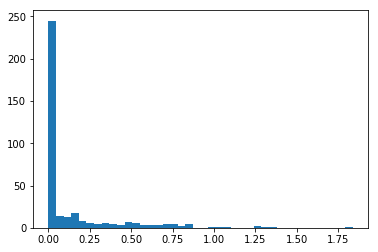

In [37]:
plt.hist(inches, 40);

### Broadcasting Example--  centering an array of data. Imagine you have an array of 10 observations, each of which consists of 3 values.

In [38]:
X = np.random.random((10, 3))
X

array([[0.25241011, 0.97572458, 0.1197632 ],
       [0.20856888, 0.23983126, 0.39034023],
       [0.61318864, 0.8603706 , 0.34645385],
       [0.2939397 , 0.39274799, 0.69444295],
       [0.71234984, 0.64181726, 0.14519247],
       [0.91796933, 0.02800916, 0.53171561],
       [0.34500616, 0.80695872, 0.07155939],
       [0.20794804, 0.24551118, 0.77437728],
       [0.45116519, 0.08043329, 0.09711552],
       [0.06215684, 0.16934182, 0.468866  ]])

In [39]:
Xmean = X.mean(0)

In [40]:
Xmean

array([0.40647027, 0.44407459, 0.36398265])

In [41]:
X_centered = X - Xmean

In [42]:
X_centered

array([[-0.15406017,  0.53164999, -0.24421945],
       [-0.19790139, -0.20424333,  0.02635758],
       [ 0.20671837,  0.41629602, -0.0175288 ],
       [-0.11253057, -0.05132659,  0.3304603 ],
       [ 0.30587957,  0.19774267, -0.21879018],
       [ 0.51149906, -0.41606543,  0.16773296],
       [-0.06146411,  0.36288413, -0.29242326],
       [-0.19852223, -0.1985634 ,  0.41039463],
       [ 0.04469491, -0.3636413 , -0.26686713],
       [-0.34431343, -0.27473277,  0.10488335]])

In [43]:
# we can check that the centered array has near zero mean: 
X_centered.mean(0)

array([-8.8817842e-17, -4.4408921e-17, -4.4408921e-17])